ABDULLAH

SU92-BSAIM-F24-002

BSAI-3A

AI-ASSIGNMENT 1&2

Required Libraries:

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML Dataset and Tools
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Model Saving
import pickle


Step 1: Data Loaded Successfully

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Step 2: Data Understanding

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data column

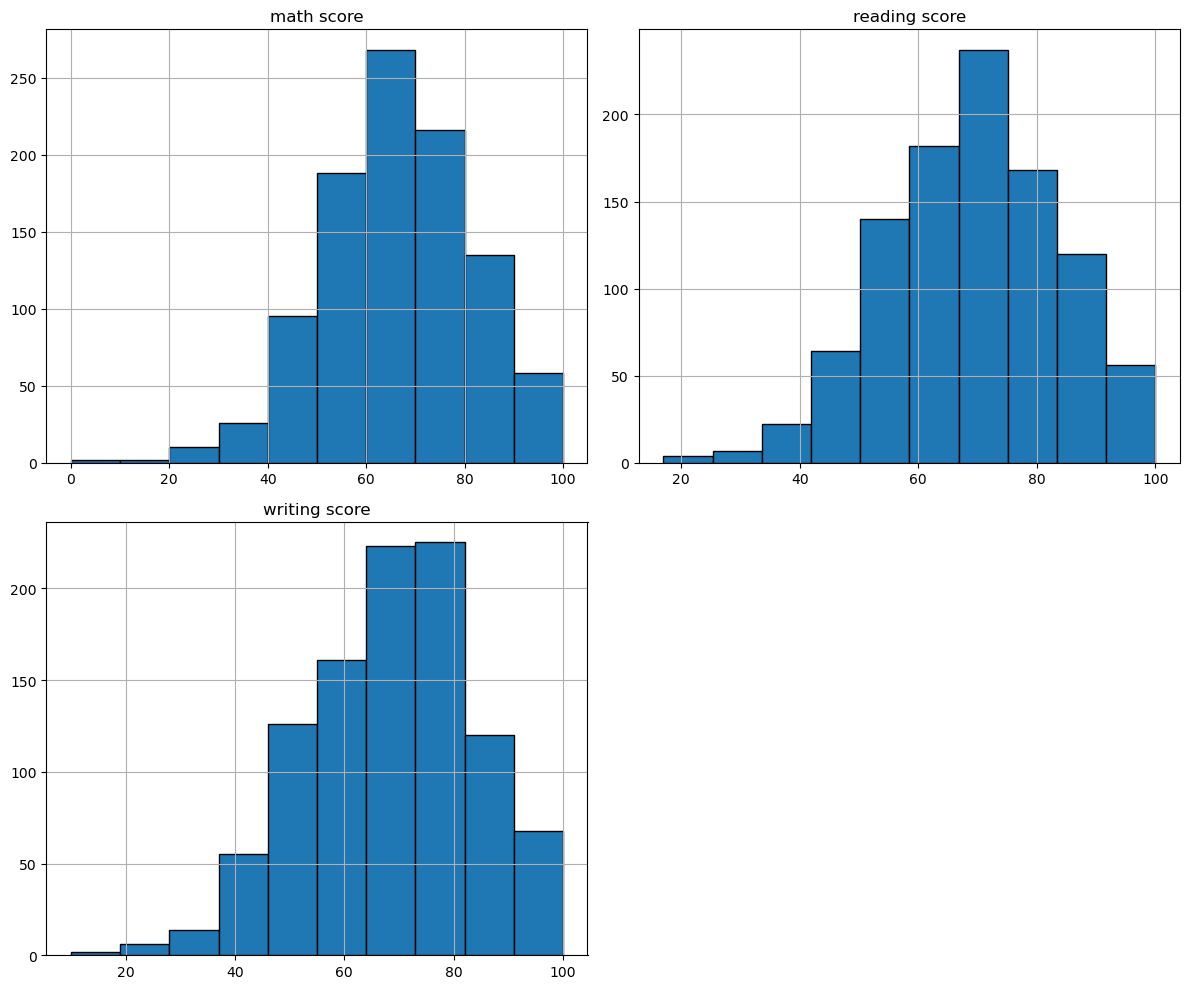


Step 5: Bivariate Analysis



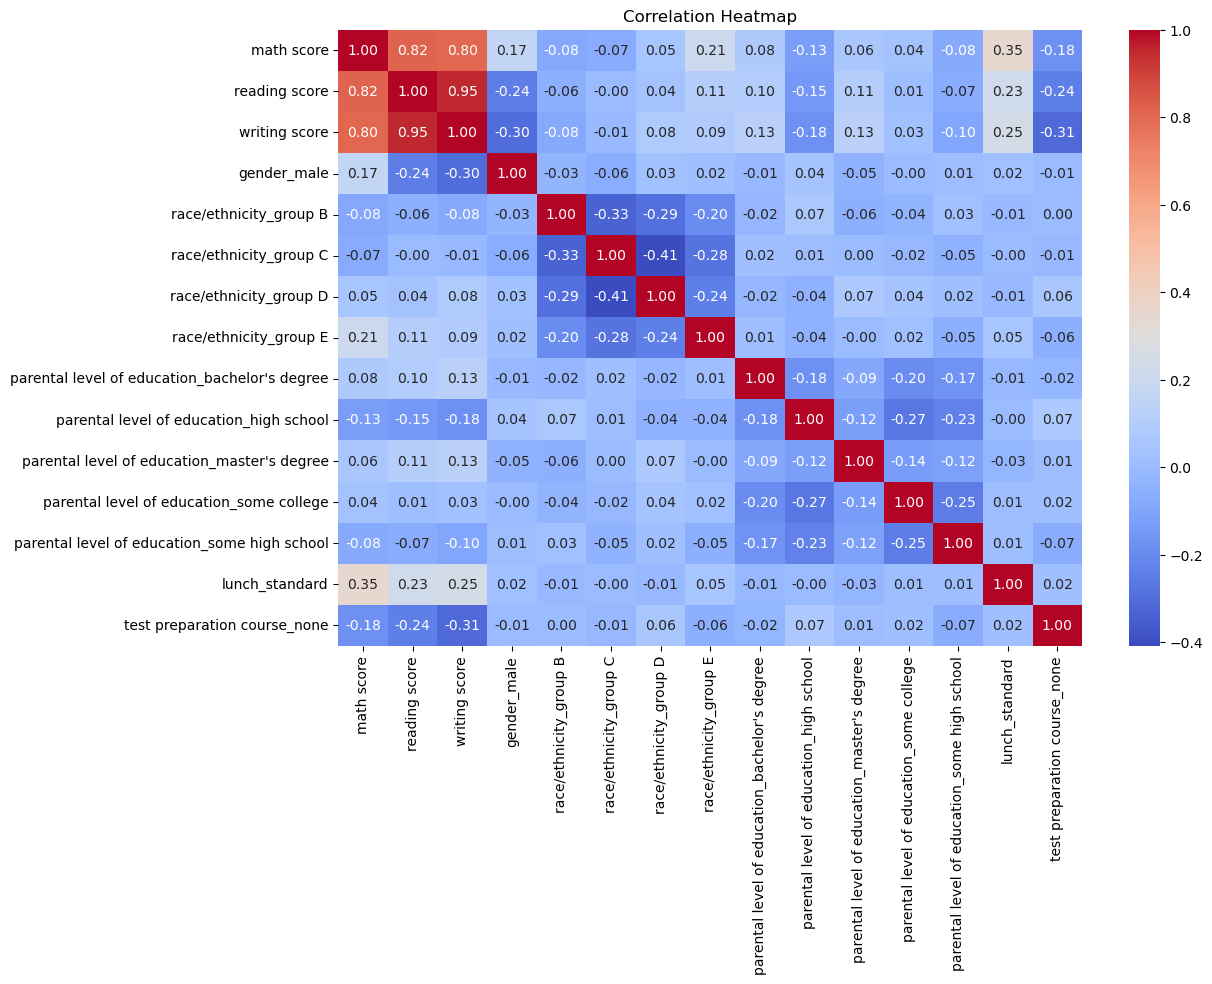


Step 5: Exploratory Data Analysis

Target Variable Distribution:



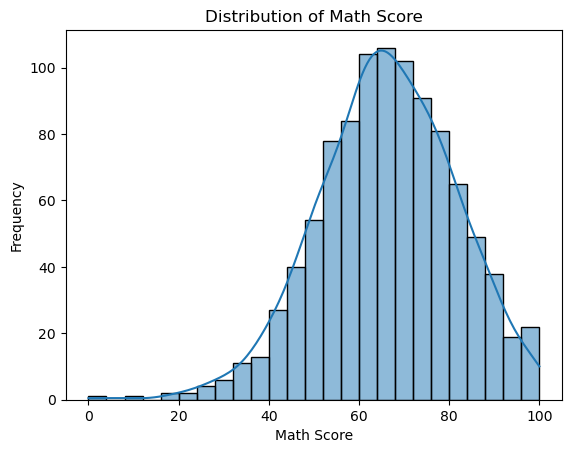

Boxplots for Numerical Features:



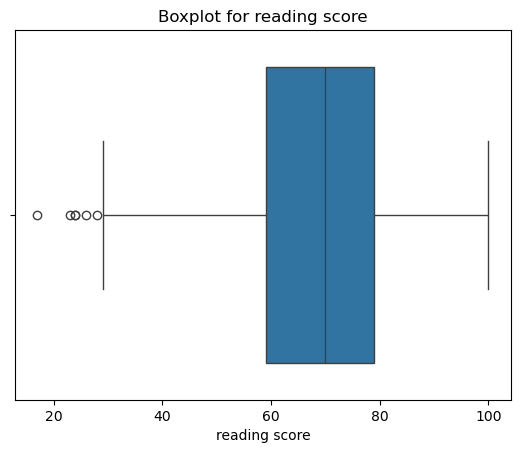

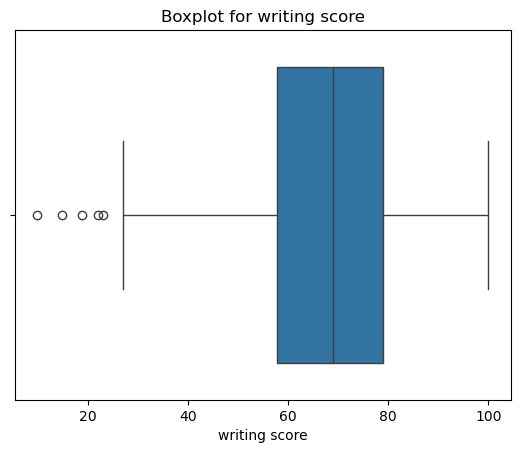

Countplots for Categorical Features:


Step 6: Splitting Data...


Step 7: Training SVM Model...

Model Trained Successfully


Evaluating Model...

Mean Squared Error: 92.06


Step 8: Model saved to 'svm.model.pk'



In [3]:
class StudentPerformanceAnalyzer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.df = None
        self.model = None

#Data Loading

    def load_data(self):
        self.df = pd.read_csv(self.file_path)
        print("Step 1: Data Loaded Successfully\n")
        print(self.df.head()) 

#Data Understanding

    def understand_data(self):
        print("\nStep 2: Data Understanding\n")
        print("Data Info:\n")
        print(self.df.info())
        print("\nData Description:\n")
        print(self.df.describe())
        print("\nMissing Values:\n")
        print(self.df.isnull().sum())    

#Step 2:Data Preprocessing

    def preprocess_data(self):
        print("\nStep 3: Preprocessing Data...\n")
        self.df = pd.get_dummies(self.df, drop_first=True)
        self.df = self.df.dropna()
        print("Data Preprocessing Completed\n") 

#Univariate Analysis

    def univariate_analysis(self):
        print("\nStep 4: Univariate Analysis\n")
        self.df.hist(figsize=(12, 10), edgecolor='black')
        plt.tight_layout()
        plt.show()

#Bivariate Analysis

    def bivariate_analysis(self):
        print("\nStep 5: Bivariate Analysis\n")
        plt.figure(figsize=(12, 8))
        sns.heatmap(self.df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()
    
# Step 3: Data Splitting

    def split_data(self):
        print("\nStep 6: Splitting Data...\n")
        X = self.df.drop("math score", axis=1)
        y = self.df["math score"]
        return train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4:Exploratory Data Analysis

    def exploratory_data_analysis(self):
        print("\nStep 5: Exploratory Data Analysis\n")
    
    # 1. Target Variable Distribution
        print("Target Variable Distribution:\n")
        sns.histplot(self.df["math score"], kde=True)
        plt.title("Distribution of Math Score")
        plt.xlabel("Math Score")
        plt.ylabel("Frequency")
        plt.show()

    # 2. Boxplots for numerical features
        print("Boxplots for Numerical Features:\n")
        numeric_cols = self.df.select_dtypes(include=["float64", "int64"]).columns
        for col in numeric_cols:
            if col != "math score":  # skip the target here
                sns.boxplot(x=self.df[col])
                plt.title(f"Boxplot for {col}")
                plt.show()
    
    # 3. Countplots for categorical features (if any)
        print("Countplots for Categorical Features:\n")
        categorical_cols = self.df.select_dtypes(include=["uint8", "object", "category"]).columns
        for col in categorical_cols:
            sns.countplot(x=self.df[col])
            plt.title(f"Countplot for {col}")
            plt.xticks(rotation=45)
            plt.show()

# Step 5: Model Train(SVM)

    def train_model(self, X_train, y_train):
        print("\nStep 7: Training SVM Model...\n")
        self.model = SVR()
        self.model.fit(X_train, y_train)
        print("Model Trained Successfully\n")

# Evaluating the Model

    def evaluate_model(self, X_test, y_test):
        print("\nEvaluating Model...\n")
        predictions = self.model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print(f"Mean Squared Error: {mse:.2f}\n")

# Step 5: Save the Model

    def save_model(self, filename="svm.model.pk"):
        with open(filename,"wb")as f:
            pickle.dump(self.model, f)
            print(f"\nStep 8: Model saved to '{filename}'\n")


analyzer = StudentPerformanceAnalyzer("StudentsPerformance.csv")

analyzer.load_data()
analyzer.understand_data()
analyzer.preprocess_data()
analyzer.univariate_analysis()
analyzer.bivariate_analysis()
analyzer.exploratory_data_analysis()
X_train, X_test, y_train, y_test = analyzer.split_data()
analyzer.train_model(X_train, y_train)
analyzer.evaluate_model(X_test, y_test)
analyzer.save_model()



    